# Workbook for 1. Reading in Climate Data + Plotting a Regionally Averaged Time Series
### **Authors**

Samantha Stevenson sstevenson@ucsb.edu


### **Table of Contents**

[Goals](#purpose)

[Download and Import Needed Packages](#import)

[Locate the Downloaded Climate File](#locate)

[Open the NetCDF File](#open)

[Print and Analyze the Data](#print)

[Convert the Time Variable to DateTime Format](#time)

[Calculate Regional Average](#variable)

[Plot!](#Plot)

[Explore on Your Own](#explore)

<a id='purpose'></a> 
# Goals

This is the companion "workbook" for the tutorial "1. Reading in Climate Data + Plotting a Regionally Averaged Time Series". It does not contain any code! You can use this as a space to create your own workflow, based on the steps in the tutorial. We suggest using the same data file mentioned in the tutorial, but:

- Specifying your own study region based on somewhere you're interested in

- Customizing your plots: play with the x and y axis ranges, change the fonts and labels, whatever you want!

You can also incorporate elements from the other tutorials in the repo if you're feeling ambitious.

<a id='import'></a> 
## **Download + Import Needed Packages**

You will need the `xarray` and `matplotlib` packages in your Python environment in order to complete this tutorial. If these have not already been installed, you can use the following commands in your __Terminal__ (Mac) or __Anaconda Prompt__ (Windows) to install them:

`conda install xarray`

`conda install matplotlib`

In [1]:
# Import necessary packages
import xarray as xr
import matplotlib.pyplot as plt

<a id='open'></a> 
## **Locate and Open the Downloaded Climate File**

Now we need to tell Python where to find the file containing climate information. This is done by specifying the file _path_, the directory where the file is located, in addition to the name of the file. You can find the path either using the Finder (Mac) or Windows Explorer, or use a quick hack:

- To find the file path name grab the downloaded file out of your finder/desktop and drag it into your terminal!
-  The terminal will spit out the name of where to find the file
-  Now Copy and paste the location of that file.
- For me it is `/Users/samstevenson/Box Sync/Climate_DataLab/tas_Amon_CanESM5_historical_r10i1p1f1_gn_185001-201412.nc`

Once you've found the file path, the next step is to use the imported package Xarray to open the data set. We’ll use the `open_dataset()` function from xarray to open the NetCDF file. This will be referred to using the syntax `xr.open_dataset()`, where `xr` is the "alias" you gave the xarray package when it was imported.

All you need to do is to copy the terminal code that revealed the location of the file in your computer and paste it into the `xr.open_dataset()` function. This function then reads the file and loads it into an xarray.Dataset object which allows for easy manipulation and analysis of the data.

In [2]:
# Open the netCDF file containing temperature information, based on the path from your local machine
data = xr.open_dataset('data/tas_Amon_CanESM5_historical_r10i1p1f1_gn_185001-201412.nc')

<a id='print'></a> 
## **Print and Analyze the Data**

It's good practice after reading information from a data file into xarray, to u se the `print` function to take a quick look at what's inside. Here, the block of code above has resulted in an xarray object called `data` - but what's in there??

 __We print the dataset because it...__
- Provides a clear picture of what the data looks like and what we have to work with
- Allows us to verify that the necessary variables (e.g, `tas` for near-air surface temperature) are present in the dataset
- Gives an indication of whether the dataset covers the required time range and geographical region that we may need if we were to plot or analyze the data

In [3]:
# Print the data contents
print(data)

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/53)
    CCCma_model_hash:            55f484f90aff0e32c5a8e92a42c6b9ae7ffe6224
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his10
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/5ed65f

<a id='time'></a> 
## **Convert the Time Variable to DateTime Format**
We will use the package `Matplotlib` for plotting our time series graph. To make sure our climate data is in the right time format for plotting we will print `data.time` to see what the format is. This is good practice, since there are many different calendars that are used by various climate models!

In the file provided, 

In [4]:
# Print the time array to see what format it uses
print(data.time)
# If it's not datetime64, convert to datetime64
time = data.time.astype('datetime64[ns]')
print(time)

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    height   float64 ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time
<xarray.DataArray 'time' (time: 1980)>
array(['1850-01-16T12:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-16T12:00:00.000000000', ...,
       '2014-10-16T12:00:00.000000000', '2014-11-16T00:00:00.000000000',
       '2014-12-16

<a id='variable'></a> 
## **Calculate Regional Average**
The dataset contains near-surface air temperature data (`tas`) recorded at different latitudes, longitudes, and times. In order to make this into a time series that you can plot, we need to reduce the dimension of the data by averaging over the latitude and longitude axes. 

For more information about all of the CMIP climate data variable short names visit [here](https://pcmdi.llnl.gov/mips/cmip3/variableList.html) and scroll down a little.

The first thing we need to do in order to create a regional average is to pick a region. 

**NOTE: if your region is small, make sure that you make it large enough to include at least one model grid point!**


-119.344061,34.237450,-118.572958,34.468736
 240.655939,         , 241.427042

In [34]:
# Select tas variable, store as xarray DataArray
tas = data['tas']

# Define min/max bounds for region of interest (NYC)
lat_min, lat_max = 34.237450, 37.67309
lon_min, lon_max = 239.0625, 241.875

In [38]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_SCRV_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_SCRV_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_SCRV = tas.where(tas_SCRV_lat & tas_SCRV_lon, drop=True)

In [43]:
# Average over lat, lon dimensions to get a time series
tas_SCRV = tas_SCRV.mean(dim=["lat", "lon"])

<a id='Plot'></a>  
## **Plot!**  
Here we will plot a time series of the air surface temperature for our climate data, which spans the entire world from 1850 to 2014. 

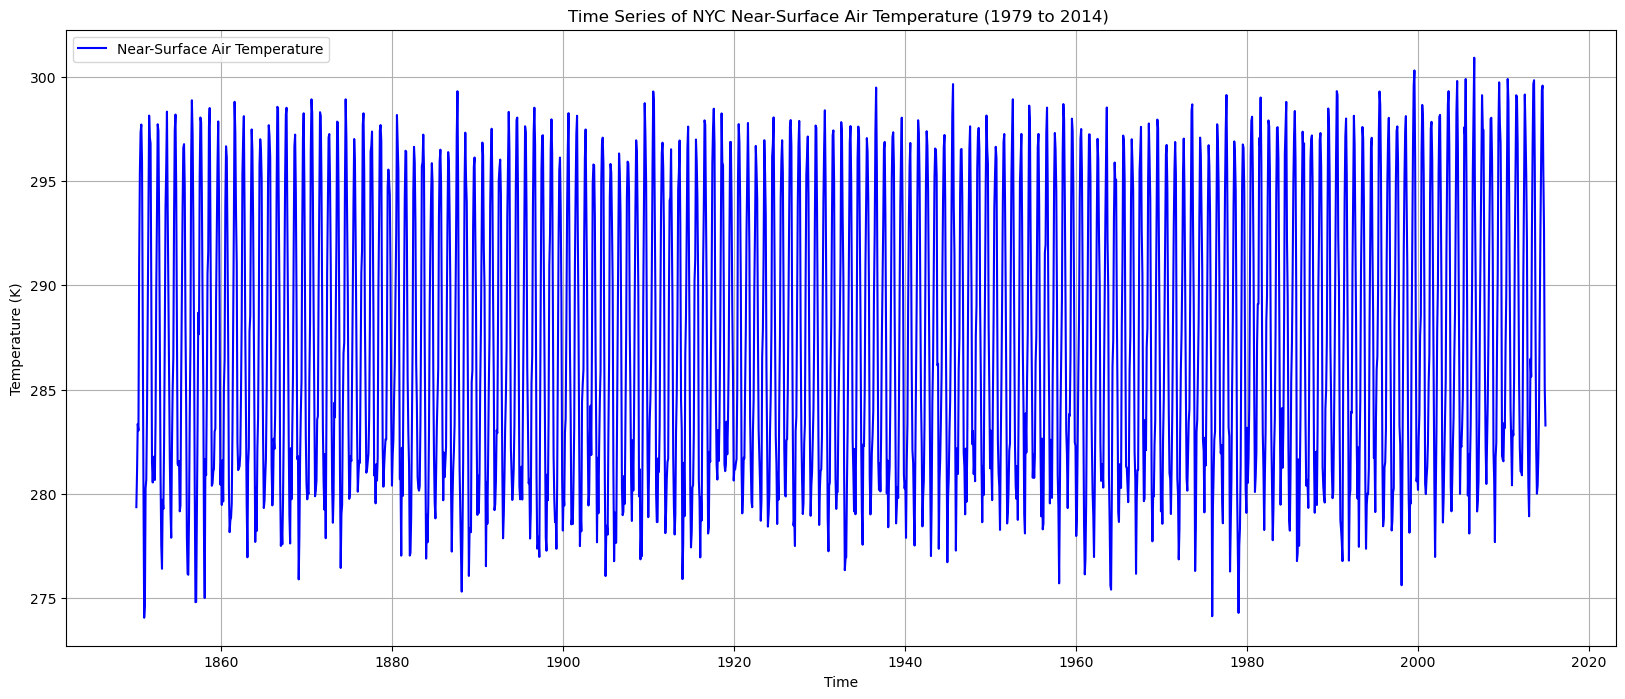

In [44]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_SCRV, label='Near-Surface Air Temperature', color='b')
ax.set_title("Time Series of NYC Near-Surface Air Temperature (1979 to 2014) ")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (K)")
ax.legend()
ax.grid()
plt.show()

<a id='explore'></a>  
## **Explore on Your Own**

Now it's time to do some playing with things on your own! See if you can change the code around, customize it, come up with new ideas, whatever you want. Some possibilities to think about:

- Add another averaging region for a second location and see if you can add it to your plot
- Plot the *difference* in temperature between two regions
- Change the line color, font sizes, or other formatting of the plot
- If you're extra excited, see if you can include some items from the next tutorials (annual averaging? Time slicing to specific year ranges? Anomaly calculation?)

In [45]:
# Define min/max bounds for region of interest (NYC)
lat_min, lat_max = 40, 41.5
lon_min, lon_max = 285.5, 287

In [46]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_NYC_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_NYC_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_NYC = tas.where(tas_NYC_lat & tas_NYC_lon, drop=True)

In [47]:
# Average over lat, lon dimensions to get a time series
tas_NYC = tas_NYC.mean(dim=["lat", "lon"])

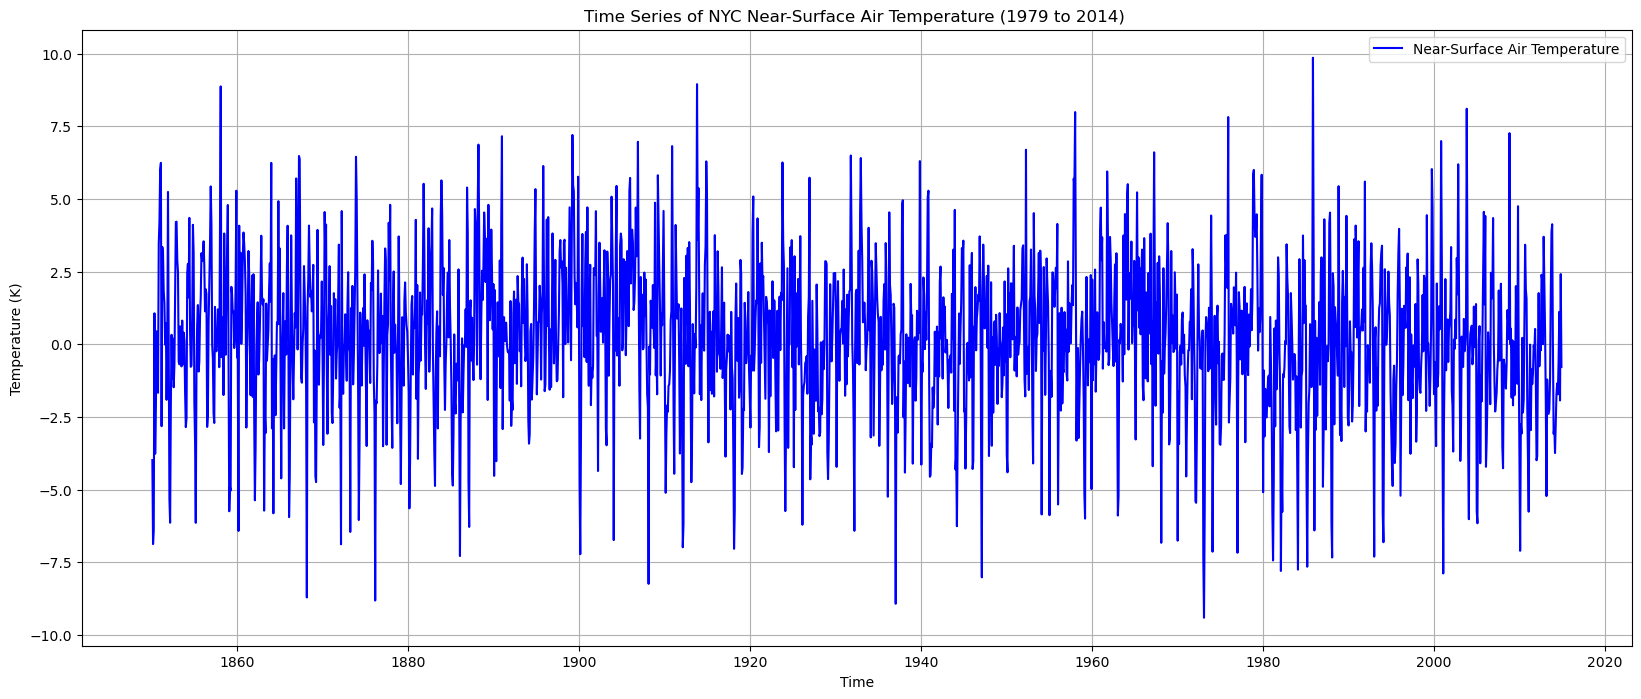

In [48]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_NYC-tas_SCRV, label='Near-Surface Air Temperature', color='b')
ax.set_title("Time Series of NYC Near-Surface Air Temperature (1979 to 2014) ")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (K)")
ax.legend()
ax.grid()
plt.show()